In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
heart_df=pd.read_csv('heart_2020_cleaned.csv')
heart_df.shape

(319795, 18)

In [3]:
print(f'head of data :\n{heart_df.head()} \ndtypes of data: \n{heart_df.dtypes} , \nsum of nulls \n{heart_df.isnull().sum()}, \nand the info is :\n{heart_df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
heart_df=heart_df.dropna()
print(heart_df.shape)

#getting the unique values of each column

for column in heart_df:
    unique_val=heart_df[column].unique()
    
    unique_count=len(unique_val)
    if unique_count <= 13 :
        print(f'the number of values for the feature {column}: is {unique_count} and they are {unique_val}')
    else:
        print(f'the number of values for the feature {column} : is {unique_count}')

(319795, 18)
the number of values for the feature HeartDisease: is 2 and they are ['No' 'Yes']
the number of values for the feature BMI : is 3604
the number of values for the feature Smoking: is 2 and they are ['Yes' 'No']
the number of values for the feature AlcoholDrinking: is 2 and they are ['No' 'Yes']
the number of values for the feature Stroke: is 2 and they are ['No' 'Yes']
the number of values for the feature PhysicalHealth : is 31
the number of values for the feature MentalHealth : is 31
the number of values for the feature DiffWalking: is 2 and they are ['No' 'Yes']
the number of values for the feature Sex: is 2 and they are ['Female' 'Male']
the number of values for the feature AgeCategory: is 13 and they are ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
the number of values for the feature Race: is 6 and they are ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
the number of val

In [5]:
heartDiseased=0
notHeartDiseased=0
for heartDisease in heart_df['HeartDisease']:
    if heartDisease == "Yes":
        heartDiseased+=1 
    else:
        notHeartDiseased+=1
print("Total HeartDiseased in the DataSet is {}".format(heartDiseased))
print("Total Not HeartDiseased in the DataSet is {}".format(notHeartDiseased))

Total HeartDiseased in the DataSet is 27373
Total Not HeartDiseased in the DataSet is 292422


In [6]:
kidneyDiseased=0
notKidneyDiseased=0
for kidneyDisease in heart_df['KidneyDisease']:
    if kidneyDisease == "Yes":
        kidneyDiseased+=1 
    else:
        notKidneyDiseased+=1
print("Total KidneyDisease in the DataSet is {}".format(kidneyDiseased))
print("Total Not KidneyDisease in the DataSet is {}".format(notKidneyDiseased))

Total KidneyDisease in the DataSet is 11779
Total Not KidneyDisease in the DataSet is 308016


In [7]:
skinCancerDiseased=0
notskinCancerDiseased=0
for skinCancer in heart_df['SkinCancer']:
    if skinCancer == "Yes":
        skinCancerDiseased+=1 
    else:
        notskinCancerDiseased+=1
print("Total SkinCancerDiseased in the DataSet is {}".format(skinCancerDiseased))
print("Total Not SkinCancerDiseased in the DataSet is {}".format(notskinCancerDiseased))

Total SkinCancerDiseased in the DataSet is 29819
Total Not SkinCancerDiseased in the DataSet is 289976


In [8]:
def alchoholDrinkers():
    ad=0
    noneAd=0
    diseased=0
    notDiseased=0
    for heartDisease ,alcoholDrinking in zip(heart_df['HeartDisease'],heart_df['AlcoholDrinking']):
        if heartDisease =='Yes' and alcoholDrinking=='Yes':
            ad+=1
        elif heartDisease=='Yes' and alcoholDrinking =='No':
            diseased+=1
        elif heartDisease=='No' and alcoholDrinking =='Yes':
            notDiseased+=1
        else:
            noneAd+=1
    adP=(ad/heart_df.shape[0])*100
    print (f'HeartDiseased and Alcoholic is :{ad}')
    print (f'HeartDiseased and Not Alcoholic is :{diseased}')
    print (f'Not HeartDiseased and Alcoholic is :{notDiseased}')
    print ('Not HeartDiseased and Not Alcoholic is :{}'.format(noneAd))
    print(f"precentage of the Alcoholic and HeartDiseased is {round(ad/heart_df.shape[0],5)*100} %")
    print(f"precentage of the Alcoholic and Not HeartDiseased is {round(notDiseased/heart_df.shape[0],4)*100} %")
alchoholDrinkers()

HeartDiseased and Alcoholic is :1141
HeartDiseased and Not Alcoholic is :26232
Not HeartDiseased and Alcoholic is :20636
Not HeartDiseased and Not Alcoholic is :271786
precentage of the Alcoholic and HeartDiseased is 0.357 %
precentage of the Alcoholic and Not HeartDiseased is 6.45 %


In [9]:
def smokerDiseased():
    sd=0
    notSd=0
    diseased=0
    notDiseased=0
    
    for heartDisease , smoker in zip(heart_df['HeartDisease'],heart_df['Smoking']):
        if heartDisease == "Yes" and smoker =="Yes":
            sd+=1
        elif heartDisease=="Yes" and smoker =="No":
            diseased+=1
        elif heartDisease=="No" and smoker =="Yes":
            notDiseased+=1
        else:
            notSd+=1
    sdPercentage=round(sd/heart_df.shape[0],5)*100
    notDPercentage=round(notDiseased/heart_df.shape[0],5)*100
    print (f'HeartDiseased and Smoking is :{sd}')
    print (f'HeartDiseased and Not Smoking is :{diseased}')
    print (f'Not HeartDiseased and Smoking is :{notDiseased}')
    print (f'Not HeartDiseased and Not Smoking is :{notSd}')
    print ('Precentage of HeartDiseased and Smoking is :{} %'.format(sdPercentage))
    print ('Precentage of Not HeartDiseased and Smoking is :{} %'.format(notDPercentage))
smokerDiseased()

HeartDiseased and Smoking is :16037
HeartDiseased and Not Smoking is :11336
Not HeartDiseased and Smoking is :115871
Not HeartDiseased and Not Smoking is :176551
Precentage of HeartDiseased and Smoking is :5.015 %
Precentage of Not HeartDiseased and Smoking is :36.233 %


In [10]:
def genderCount():
    male=0
    female=0
    diseased_males=0
    diseased_females=0
    for gender in heart_df['Sex']:
        if gender =="Male":
            male+=1
        else:
            female+=1
    print('Number of Males in the dataset = {} \nNumber of females in the dataset ={}'
          .format(male,female))
    for heartDiseased , gender in zip(heart_df['HeartDisease'],heart_df['Sex']):
        if heartDiseased == "Yes" and gender =="Male":
            diseased_males+=1
        elif heartDiseased=="Yes" and gender =="Female":
            diseased_females+=1
    print (f"Diseased Males = {diseased_males}\nDiseased Females = {diseased_females}")
    print(f"The percentage of the diseased Males:{round(diseased_males/male,3)*100} %")
    print(f'The percentage of the diseased Females{round(diseased_females/female,3)*100} %')
    
genderCount()

Number of Males in the dataset = 151990 
Number of females in the dataset =167805
Diseased Males = 16139
Diseased Females = 11234
The percentage of the diseased Males:10.6 %
The percentage of the diseased Females6.7 %


In [11]:
#def diseasedGenders():
    #male=0
#    female=0
#    for heartDiseased , gender in zip(heart_df['HeartDisease'],heart_df['Sex']):
#        if heartDiseased == "Yes" and gender =="Male":
#            male+=1
#        elif heartDiseased=="Yes" and gender =="Female":
#            female+=1
#    print (f"Diseased Males = {male}\nDiseased Females = {female}")

#diseasedGenders()

In [12]:
ageCount={}
for heartDiseased , age in zip(heart_df['HeartDisease'],heart_df['AgeCategory']):
    if heartDiseased == "Yes":
        ageCount[age]=ageCount.get(age,0)+1
print (f"count for the HeartDiseases for every cateogry is : {sorted(ageCount.items())}")

count for the HeartDiseases for every cateogry is : [('18-24', 130), ('25-29', 133), ('30-34', 226), ('35-39', 296), ('40-44', 486), ('45-49', 744), ('50-54', 1383), ('55-59', 2202), ('60-64', 3327), ('65-69', 4101), ('70-74', 4847), ('75-79', 4049), ('80 or older', 5449)]


Diseased patients from Category 18-24 = 130 
Diseased patients from Category 25-29 = 133 
Diseased patients from Category 30-34 = 226 
Diseased patients from Category 35-39 = 296 
Diseased patients from Category 40-44 = 486 
Diseased patients from Category 45-49 = 744 
Diseased patients from Category 50-54 = 1383 
Diseased patients from Category 55-59 = 2202 
Diseased patients from Category 60-64 = 3327 
Diseased patients from Category 65-69 = 4101 
Diseased patients from Category 70-74 = 4847 
Diseased patients from Category 75-79 = 4049 
Diseased patients from Category 80 or older = 5449 


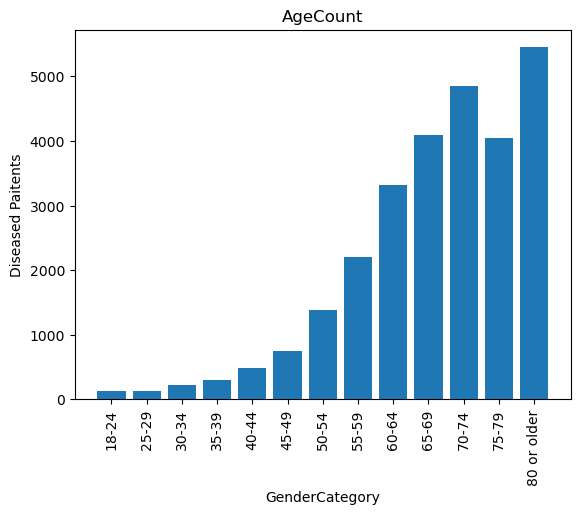

In [13]:
#ageCount['18-24']
for index in sorted(ageCount):
    print (f"Diseased patients from Category {index} = {ageCount[index]} ")

myList = sorted(ageCount.items())
#myList = sorted(myList) 
x, y = zip(*myList) 

plt.bar(x,y)
plt.xlabel('GenderCategory')
plt.ylabel('Diseased Paitents')
plt.xticks(rotation=90)
plt.title('AgeCount')

plt.show()

In [14]:
def differentRace():
    white=0
    black=0
    asian=0
    amirican=0
    other=0
    hispanic=0
    for heartDiseased , color in zip(heart_df['HeartDisease'],heart_df['Race']):
        if heartDiseased == 'Yes' and color=="American Indian/Alaskan Native":
            amirican += 1
        elif heartDiseased == 'Yes' and color=="White":
            white+=1
        elif heartDiseased == 'Yes' and color=="Black":
            black+=1
        elif heartDiseased == 'Yes' and color=="Asian":
            asian+=1
        elif heartDiseased == 'Yes' and color=="Hispanic":
            hispanic+=1
        elif heartDiseased == 'Yes' and color=="Other":
            other+=1
                
    print(f"HeartDiseased and Amirican are :{amirican}")
    print(f"HeartDiseased and white are :{white}")
    print(f"HeartDiseased and black are :{black}")
    print(f"HeartDiseased and asian are :{asian}")
    print(f"HeartDiseased and other are :{other}")
    print(f"HeartDiseased and other are :{hispanic}")
        
differentRace()

HeartDiseased and Amirican are :542
HeartDiseased and white are :22507
HeartDiseased and black are :1729
HeartDiseased and asian are :266
HeartDiseased and other are :886
HeartDiseased and other are :1443


In [15]:
class HeartDiseases:
    def __init__(self) :
        self.kidney_Diseases=0
        self.kidney_Diseases_Heart_Diseases=0
        self.not_kidney_Diseases=0
        self.skin_Cancer=0
        self.Skin_Cancer_Heart_Diseases=0
        self.not_Skin_Cancer=0
    def kidneyDiseases(self):
        for heartDiseased , kidneyDiseased in zip(heart_df['HeartDisease'],heart_df['KidneyDisease']):
            if heartDiseased == 'Yes' and kidneyDiseased=="Yes":
                self.kidney_Diseases_Heart_Diseases += 1
            elif heartDiseased == 'Yes' and kidneyDiseased=="No":
                self.not_kidney_Diseases+=1
            elif heartDiseased == 'No' and kidneyDiseased=="Yes":
                self.kidney_Diseases+=1
        print(f"HeartDiseased and KidneyDiseased are :{self.kidney_Diseases_Heart_Diseases}")
        print(f"HeartDiseased and Not KidneyDiseased are :{self.not_kidney_Diseases}")
        print(f"Not HeartDiseased but have KidneyDiseased are :{self.kidney_Diseases}")
        
    def skinCancer(self):    
        for heartDiseased , skin_Cancer in zip(heart_df['HeartDisease'],heart_df['SkinCancer']):
            if heartDiseased == 'Yes' and skin_Cancer=="Yes":
                self.Skin_Cancer_Heart_Diseases+=1
            elif heartDiseased == 'Yes' and skin_Cancer=="No":
                self.not_Skin_Cancer+=1
            elif heartDiseased == 'No' and skin_Cancer=="Yes":
                self.skin_Cancer+=1
        print(f"HeartDiseased and skinCancer are :{self.Skin_Cancer_Heart_Diseases}")
        print(f"HeartDiseased and Not skinCancer are :{self.not_Skin_Cancer}")
        print(f"Not HeartDiseased but have skinCancer are :{self.skin_Cancer}")
heart=HeartDiseases()
    

In [16]:
heart.kidneyDiseases()

HeartDiseased and KidneyDiseased are :3455
HeartDiseased and Not KidneyDiseased are :23918
Not HeartDiseased but have KidneyDiseased are :8324


In [17]:
heart.skinCancer()

HeartDiseased and skinCancer are :4980
HeartDiseased and Not skinCancer are :22393
Not HeartDiseased but have skinCancer are :24839


In [18]:
x=0
y=0

for human in heart_df['Asthma']:
    if human =="Yes":
        x+=1
    else:
        y+=1
print("Number of people have Asthma = ",x)
print("Number of people not have Asthma =",y)

Number of people have Asthma =  42872
Number of people not have Asthma = 276923


In [19]:
L1=[]
L2=[]
for i in heart_df['Asthma']:
    if i =="Yes":
        L1.append(i)
    else :
        L2.append(i)
print("Number of people have Asthma = ",len(L1))
print("Number of people not have Asthma =",len(L2))

Number of people have Asthma =  42872
Number of people not have Asthma = 276923


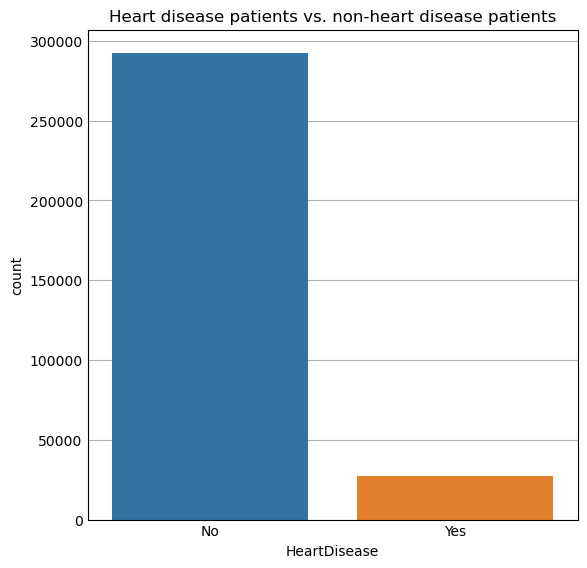

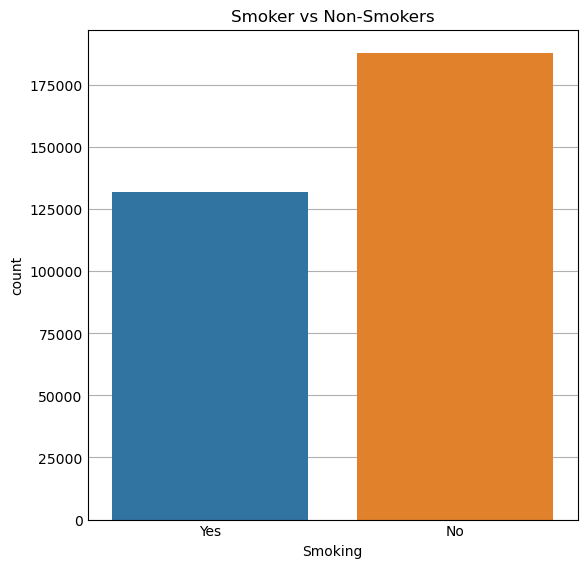

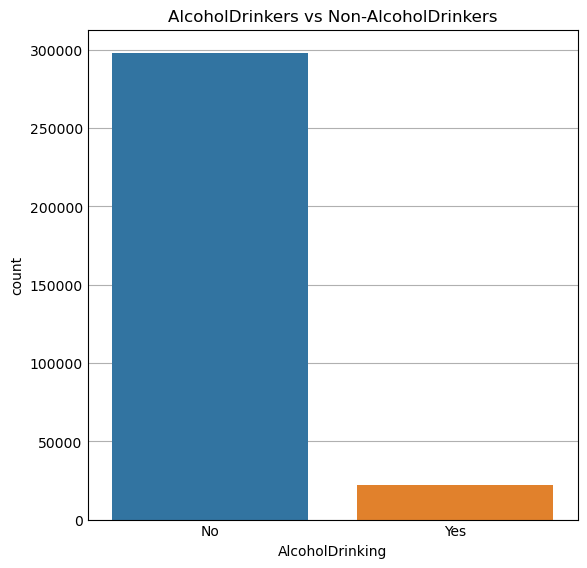

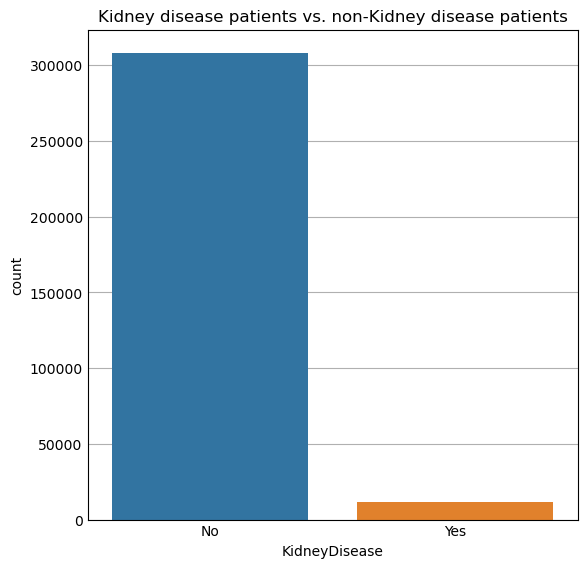

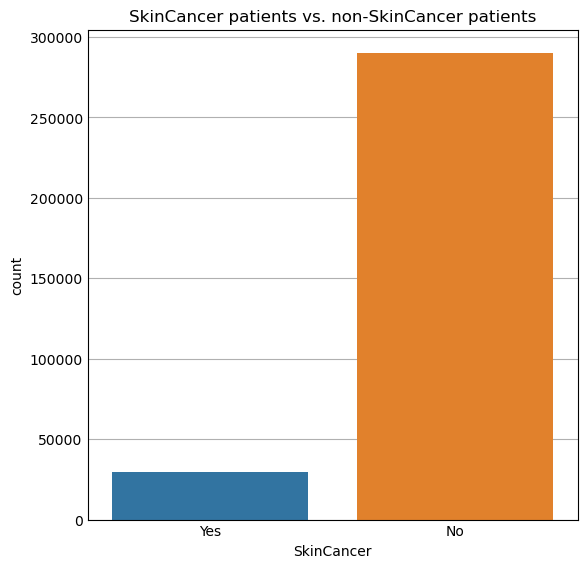

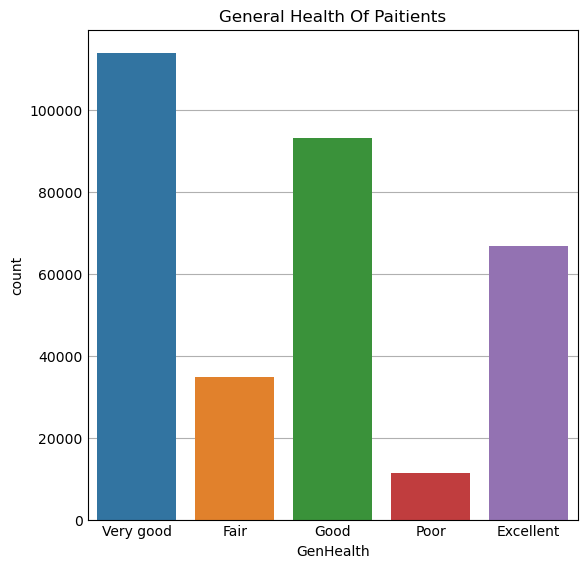

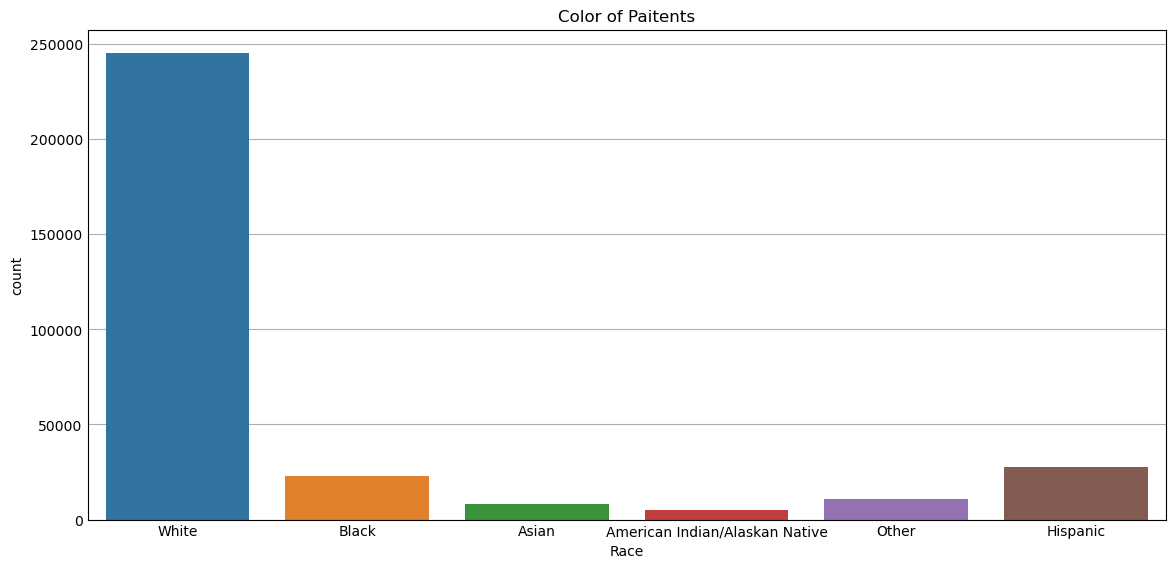

In [20]:
def Visualization():
    plt.style.use('_mpl-gallery')
    plt.figure(figsize=(5,5))
    plt.title('Heart disease patients vs. non-heart disease patients')
    sns.countplot(x='HeartDisease',data=heart_df)
    plt.show()
    
    plt.figure(figsize=(5,5))
    plt.title('Smoker vs Non-Smokers')
    sns.countplot(x='Smoking',data=heart_df)
    plt.show()
    
    plt.figure(figsize=(5,5))
    plt.title('AlcoholDrinkers vs Non-AlcoholDrinkers')
    sns.countplot(x='AlcoholDrinking',data=heart_df)
    plt.show()
    
    plt.figure(figsize=(5,5))
    plt.title('Kidney disease patients vs. non-Kidney disease patients')
    sns.countplot(x='KidneyDisease',data=heart_df)
    plt.show()
    
    plt.figure(figsize=(5,5))
    plt.title('SkinCancer patients vs. non-SkinCancer patients')
    sns.countplot(x='SkinCancer',data=heart_df)
    plt.show()
    
    plt.figure(figsize=(5,5))
    plt.title("General Health Of Paitients")
    sns.countplot(x='GenHealth',data=heart_df)
    plt.show()
    
    plt.figure(figsize=(11,5))
    plt.title("Color of Paitents")
    sns.countplot(x='Race',data=heart_df,)
    plt.show()
    
Visualization()

In [21]:
#print(plt.style.available)

<AxesSubplot:>

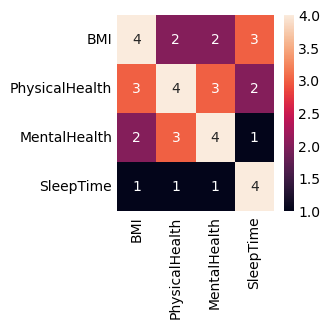

In [23]:
sns.heatmap(data=heart_df.corr().rank(),annot=True)